In [1]:
import pyspeckit as ps
from astropy.io import fits
from bokeh.layouts import column

import os

import astropy.units as u
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from bokeh.plotting import output_notebook, figure, show
from bokeh.models import HoverTool, tools
from bokeh.models import Span, Label, Arrow, NormalHead
import numpy as np
output_notebook()
%matplotlib widget

import warnings
#warnings.filterwarnings('ignore')

#f = fits.open('../Observation1/data/FixedAstrometryDATACUBE_FINAL.fits')

#c = ps.Cube(f[1])
cube1= SpectralCube.read('../Observation1/data/FixedAstrometryDATACUBE_FINAL.fits',hdu=1)






##Emission Lines
class line(object):
    def __init__(self,name):
        self.name = name


#c = ps.Cube(cube=cube1)

Loading BokehJS ...

'10**(-20)*erg/s/cm**2/Angstrom' contains multiple slashes, which is discouraged by the FITS standard


Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
This function (<function BaseSpectralCube.sum at 0x7f0242df8840>) requires loading the entire cube into memory and may therefore be slow.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

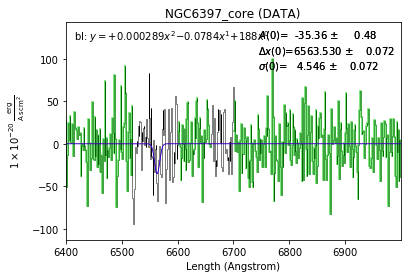

In [4]:
sourcename = 'U24'
region = 'fk5; circle(17:40:41.4725, -53:40:04.705, 0.200")'
backgroundreg = 'fk5; circle(17:40:41.4316, -53:40:05.162, 0.200")'

filename = '{}.fits'.format(sourcename)
filenamesky = '{}sky.fits'.format(sourcename)
diclines = {line('H'+u"\u03B1"):6563}
plotlines = 'True'

#Spectrum
subcube = cube1.subcube_from_ds9region(region)  
spectrum = subcube.sum(axis=(1, 2)) 

#Sky
subcubesky = cube1.subcube_from_ds9region(backgroundreg)  
spectrumsky = subcubesky.sum(axis=(1, 2)) 

if os.path.isfile(filename):
    os.remove(filename)
spectrum.write(filename)



if os.path.isfile(filenamesky):
    os.remove(filenamesky)
spectrumsky.write(filenamesky)



###
#Substarct the sky
pyspec = ps.Spectrum(filename)
pyspecsky = ps.Spectrum(filenamesky)

skysubstractedpyspec = pyspec - pyspecsky

        
#Tool to get wavelength
hover2 = HoverTool(
        tooltips=[
            ("(x,y)", "($x{1}, $y)"),
        ]
    )

        


# create a new plot
p = figure(plot_width=900, plot_height=500, title=sourcename,active_drag='pan', active_scroll='wheel_zoom')


#plot Lines

# add some renderers
p.line(cube1.spectral_axis,spectrum)

x = np.array(cube1.spectral_axis)
y = np.array(spectrum)
for name, xloc in diclines.items():
    yloc = y[np.where(abs(xloc - x) < 2)[0][0]]
    span = Arrow(end=NormalHead(fill_color='orange', size=10),
             x_start=xloc, y_start = yloc + 2005, x_end = xloc, y_end= yloc+1000
            )
    if plotlines == 'True':
        p.add_layout(span)
        my_label = Label(x=xloc-1, y=yloc+2000, text=name.name)
        p.add_layout(my_label)


p.add_tools(hover2)







##Second plot
# create a new plot
p = figure(plot_width=900, plot_height=500, title=sourcename,active_drag='box_zoom', active_scroll='wheel_zoom')


#plot Lines

# add some renderers
p.line(cube1.spectral_axis,spectrum)

x = np.array(cube1.spectral_axis)
y = np.array(spectrum)
for name, xloc in diclines.items():
    yloc = y[np.where(abs(xloc - x) < 2)[0][0]]
    span = Arrow(end=NormalHead(fill_color='orange', size=10),
             x_start=xloc, y_start = yloc + 2005, x_end = xloc, y_end= yloc+1000
            )
    if plotlines == 'True':
        p.add_layout(span)
        my_label = Label(x=xloc-1, y=yloc+2000, text=name.name)
        p.add_layout(my_label)


p.add_tools(hover2)



#Plot 2
##Second plot
# create a new plot
p2 = figure(plot_width=900, plot_height=500, title=sourcename+'no sky',active_drag='box_zoom', active_scroll='wheel_zoom')


#plot Lines

# add some renderers

inds = np.argsort(skysubstractedpyspec.xarr)
xp2 = skysubstractedpyspec.xarr.value[inds]
yp2 = skysubstractedpyspec.data[inds]

p2.line(xp2,yp2)

x = np.array(xp2)
y = np.array(yp2)
for name, xloc in diclines.items():
    yloc = y[np.where(abs(xloc - x) < 2)[0][0]]
    span = Arrow(end=NormalHead(fill_color='orange', size=10),
             x_start=xloc, y_start = yloc + 2005, x_end = xloc, y_end= yloc+1000
            )
    if plotlines == 'True':
        p2.add_layout(span)
        my_label = Label(x=xloc-1, y=yloc+2000, text=name.name)
        p2.add_layout(my_label)


p2.add_tools(hover2)



inds = np.argsort(skysubstractedpyspec.xarr)


#Build gaussian

skysubstractedpyspec.plotter()


skysubstractedpyspec.crop(6400., 7000, unit='angstrom') 


#skysubstractedpyspec.baseline(exclude=[4000,5000,6450,6746,6815,6884,7003,7126,7506,7674,8142,8231], order=5,subtract=False, highlight_fitregion=True)
skysubstractedpyspec.baseline(xmin=6000, xmax=7000,exclude=[6520,6600,6660,6700],order=2,subtract=True, highlight_fitregion=True)



#skysubstractedpyspec.plotter(xmin=6100,xmax=7000)



#skysubstractedpyspec.plotter()

skysubstractedpyspec.specfit(guesses=[4500.,6564.,10.], 
             fittype='gaussian', show_components=True, annotate =True)



skysubstractedpyspec.plotter.refresh()


#Show plots
show(column(p,p2))